In [17]:
# Assignment 1: Basic Statistics + Visualization + Preprocessing
# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Load the dataset
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [19]:
# Basic checks
df.shape

(450, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [21]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [22]:
# Descriptive statistics (mean, median, mode, std)
# Using pandas functions (as typically done in class)

desc_stats = pd.DataFrame({
    "mean": df[numerical_cols].mean(),
    "median": df[numerical_cols].median(),
    "mode": df[numerical_cols].mode().iloc[0],   # first mode (if multiple)
    "std": df[numerical_cols].std()
})

desc_stats

,mean,median,mode,std
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [23]:
# Quick interpretation helper (optional)
# Compare mean vs median to sense skewness

skew_check = pd.DataFrame({
    "mean": df[numerical_cols].mean(),
    "median": df[numerical_cols].median(),
    "mean_minus_median": df[numerical_cols].mean() - df[numerical_cols].median(),
    "std": df[numerical_cols].std()
})

skew_check

,mean,median,mean_minus_median,std
Volume,5.066667,4.000000,1.066667,4.231602
Avg Price,10453.433333,1450.000000,9003.433333,18079.904840
Total Sales Value,33812.835556,5700.000000,28112.835556,50535.074173
Discount Rate (%),15.155242,16.577766,-1.422524,4.220602
Discount Amount,3346.499424,988.933733,2357.565691,4509.902963
Net Sales Value,30466.336131,4677.788059,25788.548072,46358.656624


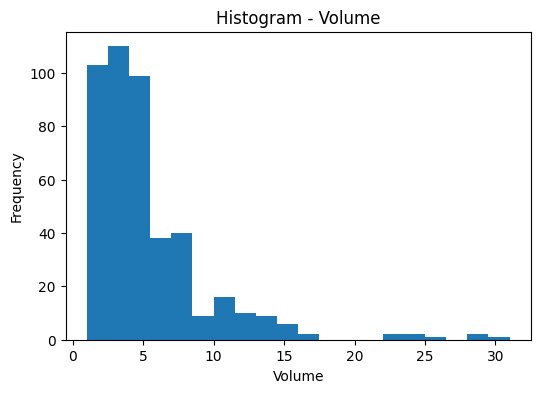

In [36]:
# Histograms for numerical columns
col = 'Volume' # Example: Choose one numerical column
plt.figure(figsize=(6,4))
plt.hist(df[col], bins=20)
plt.title(f"Histogram - {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

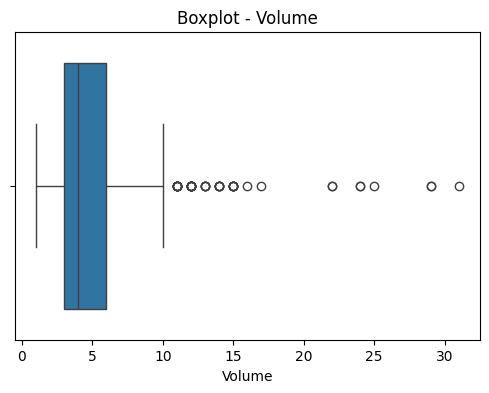

In [34]:
# Boxplots for numerical columns (outlier detection)
col = 'Volume' # Example: Choose one numerical column
plt.figure(figsize=(6,4))
sns.boxplot(x=df[col])
plt.title(f"Boxplot - {col}")
plt.show()

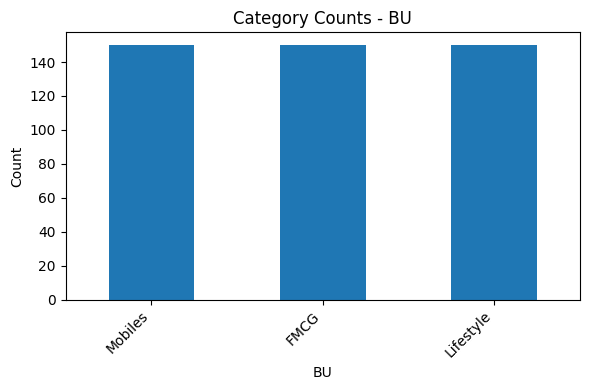

In [35]:
# Bar chart analysis for a single categorical column (e.g., 'BU')

col = 'BU' # Example: Choosing one categorical column
vc = df[col].value_counts()

plt.figure(figsize=(6,4))
vc.plot(kind="bar")
plt.title(f"Category Counts - {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
# Standardization (Z-score normalization)
# z = (x - mean) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_std = df.copy()
df_std[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_std.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595


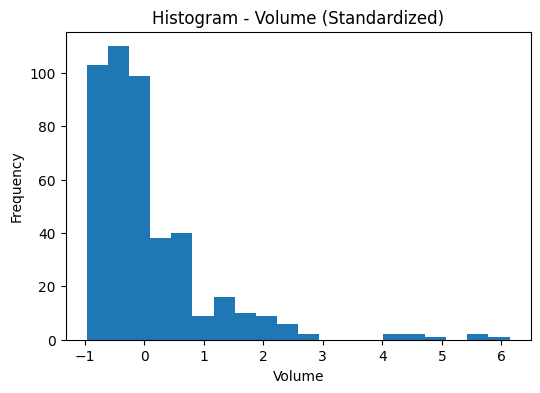

In [32]:
# Show a single histogram (e.g., for 'Volume') after standardization
plt.figure(figsize=(6,4))
plt.hist(df_std['Volume'], bins=20)
plt.title("Histogram - Volume (Standardized)")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

In [29]:
# One-hot encoding for categorical columns (Dummy variables)
# ML models need numeric input; one-hot encoding converts categories to 0/1 columns.

df_encoded = pd.get_dummies(df_std, columns=categorical_cols, drop_first=True)

df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
# Final shape after encoding
df_encoded.shape

(450, 94)

In [31]:
# Sample of transformed dataset (few columns)
df_encoded.iloc[:5, :15]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,False,False,False,False,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,False,False,False,False,False
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,False,False,False,False,False


### Conclusion

- Computed **mean, median, mode, standard deviation** for all numerical columns.
- Used **histograms** to see distributions and skewness.
- Used **boxplots** to detect outliers
- Used **bar charts** to understand categorical frequency distributions
- Performed **standardization** for the  numerical columns
- Performed **one-hot encoding** to the categorical variables become
